# EDA_Project_Solution Part 2 - Handling with Missing Values and Outliers

## Importing libraries and precleaned data

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import timedelta
import statistics as stats
%matplotlib inline
plt.style.use('ggplot')

# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)


# Avoiding unneccessary warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [3]:
# Loading data
car=pd.read_csv("car_Part1_cleaned.csv")

# Detecting and Filling Missing Values

In [4]:
car.head()

,body_type,price,vat,make1,model1,short_description1_displ,km1,age1,hp1,Type1,Body_Color1,Upholstery1,Nr_of_Doors1,Nr_of_Seats1,Gearing_Type1,Displacement1,Cylinders1,Weight1,Drive_chain1,Fuel1,Consump_comb1,Consump_city1,Consump_country1,CO2_Emission1,Comfort_point1,Entertainment_point1,Extras_point1,Safety_point1,Gears1
0,Sedans,15770,VAT deductible,Audi,A1,1.4,56013.0,3.917808,66.0,Used,Black,Cloth,5.0,5.0,Automatic,1.4,3.0,1220.0,front,Diesel,3.8,3.8,3.8,99.0,16.0,4.0,3.0,14.0,NaN
1,Sedans,14500,Price negotiable,Audi,A1,1.8,80000.0,2.753425,141.0,Used,Red,Cloth,3.0,4.0,Automatic,1.8,4.0,1255.0,front,Gasoline,5.6,5.6,5.6,129.0,9.0,5.0,4.0,15.0,7.0
2,Sedans,14640,VAT deductible,Audi,A1,1.6,83450.0,3.832877,85.0,Used,Black,Cloth,4.0,4.0,Automatic,1.6,NaN,NaN,front,Diesel,3.8,3.8,3.8,99.0,13.0,2.0,2.0,12.0,NaN
3,Sedans,14500,NaN,Audi,A1,1.4,73000.0,3.334247,66.0,Used,Brown,NaN,3.0,4.0,Automatic,1.4,3.0,1195.0,NaN,Diesel,3.8,3.8,3.8,99.0,16.0,8.0,3.0,14.0,6.0
4,Sedans,16790,NaN,Audi,A1,1.4,16200.0,3.586301,66.0,Used,Black,Cloth,5.0,5.0,Automatic,1.4,3.0,NaN,front,Diesel,4.1,4.1,4.1,109.0,13.0,7.0,4.0,13.0,NaN


In [5]:
car.describe(include='all')

,body_type,price,vat,make1,model1,short_description1_displ,km1,age1,hp1,Type1,Body_Color1,Upholstery1,Nr_of_Doors1,Nr_of_Seats1,Gearing_Type1,Displacement1,Cylinders1,Weight1,Drive_chain1,Fuel1,Consump_comb1,Consump_city1,Consump_country1,CO2_Emission1,Comfort_point1,Entertainment_point1,Extras_point1,Safety_point1,Gears1
count,15859,15919.000000,11406,15919,15919,11636.000000,14895.000000,14322.000000,15831.000000,15917,15322,12197,15707.000000,14942.000000,15919,15423.000000,10239.000000,8945.000000,9061,15919,13886.000000,13483.000000,13543.000000,13483.000000,14999.000000,14545.000000,12957.000000,14937.000000,11207.000000
unique,9,NaN,2,3,9,NaN,NaN,NaN,NaN,5,14,3,NaN,NaN,3,NaN,NaN,NaN,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sedans,NaN,VAT deductible,Opel,A3,NaN,NaN,NaN,NaN,Used,Black,Cloth,NaN,NaN,Manual,NaN,NaN,NaN,front,Gasoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7903,NaN,10980,7343,3097,NaN,NaN,NaN,NaN,11096,3745,9689,NaN,NaN,8153,NaN,NaN,NaN,8886,8557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,18019.896727,NaN,NaN,NaN,1.482674,34130.127828,2.159684,88.367696,NaN,NaN,NaN,4.656077,4.949873,NaN,1.426097,3.797343,1351.106540,NaN,NaN,4.827942,4.826144,4.820778,115.076244,12.277218,4.688072,2.509763,12.793198,5.920585
std,NaN,7386.169409,NaN,NaN,NaN,0.423433,37352.977568,1.056179,26.835135,NaN,NaN,NaN,0.645298,0.489872,NaN,0.339893,0.415382,220.661532,NaN,NaN,0.923898,0.916413,0.924897,271.798847,5.960069,2.004563,1.535673,4.069892,0.738969
min,NaN,13.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1.000000,2.000000,NaN,0.000000,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,12850.000000,NaN,NaN,NaN,1.400000,5153.000000,1.334247,66.000000,NaN,NaN,NaN,4.000000,5.000000,NaN,1.200000,4.000000,1165.000000,NaN,NaN,4.100000,4.000000,4.000000,103.000000,7.000000,3.000000,1.000000,10.000000,5.000000
50%,NaN,16900.000000,NaN,NaN,NaN,1.500000,22740.000000,1.915068,85.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,1.500000,4.000000,1288.000000,NaN,NaN,4.800000,4.800000,4.800000,114.000000,13.000000,5.000000,2.000000,13.000000,6.000000
75%,NaN,21900.000000,NaN,NaN,NaN,1.600000,49371.500000,3.000000,101.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,1.600000,4.000000,1487.000000,NaN,NaN,5.400000,5.400000,5.400000,128.000000,16.000000,6.000000,3.000000,15.000000,6.000000


In [6]:
car.isnull().sum().sort_values()

Gearing_Type1                  0
price                          0
Fuel1                          0
make1                          0
model1                         0
Type1                          2
body_type                     60
hp1                           88
Nr_of_Doors1                 212
Displacement1                496
Body_Color1                  597
Comfort_point1               920
Nr_of_Seats1                 977
Safety_point1                982
km1                         1024
Entertainment_point1        1374
age1                        1597
Consump_comb1               2033
Consump_country1            2376
CO2_Emission1               2436
Consump_city1               2436
Extras_point1               2962
Upholstery1                 3722
short_description1_displ    4283
vat                         4513
Gears1                      4712
Cylinders1                  5680
Drive_chain1                6858
Weight1                     6974
dtype: int64

------------------------------------------------------------------

*Starting to fill from smallest missing value column*

## Type1

In [7]:
# Checking km average for Type
car.groupby('Type1')['km1'].mean()

Type1
Demonstration      5099.474443
Employee's car    20021.291127
New                  17.078652
Pre-registered      149.253612
Used              43685.697410
Name: km1, dtype: float64

In [8]:
# Checking price average for Type
car.groupby('Type1')['price'].mean().round()

Type1
Demonstration     25774.0
Employee's car    18398.0
New               23769.0
Pre-registered    20743.0
Used              16239.0
Name: price, dtype: float64

In [9]:
# Examining 2 missing values
car[car['Type1'].isnull()]

,body_type,price,vat,make1,model1,short_description1_displ,km1,age1,hp1,Type1,Body_Color1,Upholstery1,Nr_of_Doors1,Nr_of_Seats1,Gearing_Type1,Displacement1,Cylinders1,Weight1,Drive_chain1,Fuel1,Consump_comb1,Consump_city1,Consump_country1,CO2_Emission1,Comfort_point1,Entertainment_point1,Extras_point1,Safety_point1,Gears1
2765,Sedans,17900,NaN,Audi,A3,2.0,115137.0,3.167123,110.0,NaN,White,Cloth,5.0,5.0,Automatic,2.0,4.0,NaN,front,Diesel,4.5,4.5,4.5,118.0,1.0,2.0,3.0,9.0,6.0
5237,Sedans,25400,NaN,Audi,A3,1.6,NaN,NaN,85.0,NaN,Grey,Cloth,5.0,5.0,Automatic,1.6,4.0,NaN,front,Diesel,3.9,3.9,3.9,103.0,1.0,2.0,1.0,9.0,7.0


In [10]:
# Filling missing values with assigning most possible value
car['Type1'][2765] = 'Used'
car['Type1'][5237] = 'New'
car['Type2'] = car['Type1']

In [11]:
print('Total Number of Missing Values for Type1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Type1'].isnull().sum()), car['Type2'].isnull().sum()))

Total Number of Missing Values for Type1 Column
-------------------------------------------------------
Before: 0 
After : 0



---

## body_type

In [12]:
# Checking most frequent values in model group
car.groupby('model1')['body_type'].value_counts()

model1    body_type    
A1        Sedans           1538
          Compact          1039
          Station wagon      21
          Other              13
          Coupe               2
          Van                 1
A2        Off-Road            1
A3        Sedans           2598
          Station wagon     282
          Compact           182
          Other              16
          Convertible         8
          Coupe               4
Astra     Station wagon    1211
          Sedans           1053
          Compact           185
          Other              67
          Coupe               2
          Off-Road            1
Clio      Sedans            918
          Compact           484
          Station wagon     337
          Other              51
          Transporter        29
          Off-Road            2
          Van                 2
          Coupe               1
Corsa     Compact          1230
          Sedans            875
          Other              87
          Coupe 

In [13]:
# Filling missing values with most frequent value of model group 
car['body_type2'] = car['body_type'].fillna(car.groupby('model1')['body_type'].apply(lambda x: x.fillna(x.mode().iloc[0])))

In [14]:
print('Total Number of Missing Values for body_type Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['body_type'].isnull().sum()), car['body_type2'].isnull().sum()))

Total Number of Missing Values for body_type Column
-------------------------------------------------------
Before: 60 
After : 0



## hp1

In [15]:
# Checking most frequent values in Displacement1 group
car.groupby('Displacement1')['hp1'].value_counts()

Displacement1  hp1  
0.0            100.0    14
               54.0     13
               147.0     6
               121.0     2
               125.0     2
                        ..
2.5            294.0    18
               270.0     2
3.0            100.0     1
15.9           100.0     1
16.0           88.0      1
Name: hp1, Length: 167, dtype: int64

In [16]:
# Filling missing values with most frequent value of Displacement1 group 
car['hp2'] = car['hp1'].fillna(car.groupby('Displacement1')['hp1'].apply(lambda x: x.fillna(x.mode()[0])))

In [17]:
print('Total Number of Missing Values for hp1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['hp1'].isnull().sum()), car['hp2'].isnull().sum()))

Total Number of Missing Values for hp1 Column
-------------------------------------------------------
Before: 88 
After : 77



In [18]:
# Filling missing values with most frequent value of model group 
car['hp2'] = car['hp2'].fillna(car.groupby('model1')['hp2'].apply(lambda x: x.fillna(x.mode()[0])))

In [19]:
print('Total Number of Missing Values for hp1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['hp1'].isnull().sum()), car['hp2'].isnull().sum()))

Total Number of Missing Values for hp1 Column
-------------------------------------------------------
Before: 88 
After : 0



## Nr_of_Doors1

In [20]:
# Checking most frequent values in model group
car.groupby('model1')['Nr_of_Doors1'].value_counts()

model1    Nr_of_Doors1
A1        5.0             1741
          4.0              536
          3.0              211
          2.0               99
A2        5.0                1
A3        5.0             2297
          4.0              634
          3.0              113
          2.0               27
Astra     5.0             1965
          4.0              533
          3.0                4
Clio      5.0             1522
          4.0              272
          1.0                1
Corsa     5.0             1277
          3.0              504
          4.0              291
          2.0               93
Duster    5.0               34
Espace    5.0              873
          4.0              105
          7.0                1
Insignia  5.0             1865
          4.0              708
Name: Nr_of_Doors1, dtype: int64

In [21]:
# Filling missing values with most frequent value of model group 
car['Nr_of_Doors2'] = car['Nr_of_Doors1'].fillna(car.groupby('model1')['Nr_of_Doors1'].apply(lambda x: x.fillna(x.mode().iloc[0])))

In [22]:
print('Total Number of Missing Values for Nr_of_Doors1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Nr_of_Doors1'].isnull().sum()), car['Nr_of_Doors2'].isnull().sum()))

Total Number of Missing Values for Nr_of_Doors1 Column
-------------------------------------------------------
Before: 212 
After : 0



## Displacement1

In [23]:
# Checking Displacement1 and short_description1_displ columns before filling
car[(car['Displacement1'].isnull())&(car['short_description1_displ'].notnull())][['model1', 'Displacement1', 'short_description1_displ']]

,model1,Displacement1,short_description1_displ
142,A1,NaN,1.6
191,A1,NaN,1.4
404,A1,NaN,1.4
412,A1,NaN,1.6
505,A1,NaN,1.0
...,...,...,...
15472,Espace,NaN,1.6
15477,Espace,NaN,1.6
15496,Espace,NaN,1.6
15573,Espace,NaN,1.6


In [24]:
# Filling Missing 337 Values with short_description1_displ
car['Displacement2'] = car['Displacement1'].fillna(car['short_description1_displ'])

In [25]:
print('Total Number of Missing Values for Displacement1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Displacement1'].isnull().sum()), car['Displacement2'].isnull().sum()))

Total Number of Missing Values for Displacement1 Column
-------------------------------------------------------
Before: 496 
After : 159



In [26]:
# Double Check of filling
car[car['Displacement2'].notnull()][['Displacement1', 'short_description1_displ']]

,Displacement1,short_description1_displ
0,1.4,1.4
1,1.8,1.8
2,1.6,1.6
3,1.4,1.4
4,1.4,1.4
...,...,...
15914,2.0,NaN
15915,1.8,NaN
15916,2.0,NaN
15917,2.0,NaN


In [27]:
# Checking most frequent Displacement values in model group
car.groupby('model1')['Displacement2'].value_counts()

model1    Displacement2
A1        1.0              1581
          1.4               659
          1.6               313
          1.5                16
          1.8                16
          2.0                14
          0.9                 5
          0.3                 1
          1.2                 1
          9.8                 1
A2        1.6                 1
A3        1.6              1809
          1.0               557
          2.0               309
          1.5               180
          1.4               171
          1.2                36
          2.5                20
          1.8                 2
          1.9                 1
Astra     1.6              1217
          1.4               865
          1.0               424
          1.5                 6
          0.1                 5
          1.7                 3
          15.9                1
Clio      1.5               639
          0.9               372
          1.2               334
          1.1   

In [28]:
# Filling missing values with most frequent value of model group 
car['Displacement2'] = car['Displacement2'].fillna(car.groupby('model1')['Displacement2'].apply(lambda x: x.fillna(x.mode().iloc[0])))

In [29]:
print('Total Number of Missing Values for Displacement1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Displacement1'].isnull().sum()), car['Displacement2'].isnull().sum()))

Total Number of Missing Values for Displacement1 Column
-------------------------------------------------------
Before: 496 
After : 0



In [30]:
# Sample check
car['model1'].iloc[8806]

'Corsa'

In [31]:
# Double Check of filling
car[car['Displacement1'].isnull()]['Displacement2']

142      1.6
191      1.4
404      1.4
412      1.6
505      1.0
        ... 
15791    1.6
15795    1.6
15804    1.6
15805    1.6
15906    1.6
Name: Displacement2, Length: 496, dtype: float64

## Body_Color1

In [32]:
# Checking most frequent Body_Color1 values in model group
car.groupby('model1')['Body_Color1'].value_counts()

model1    Body_Color1
A1        White          727
          Black          717
          Grey           327
          Blue           286
          Red            250
                        ... 
Insignia  Green           49
          Red             43
          Beige           12
          Bronze           1
          Orange           1
Name: Body_Color1, Length: 77, dtype: int64

In [33]:
# Filling missing values with most frequent value of model group 
car['Body_Color2'] = car['Body_Color1'].fillna(car.groupby('model1')['Body_Color1'].apply(lambda x: x.fillna(x.mode().iloc[0])))

In [34]:
print('Total Number of Missing Values for Body_Color1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Body_Color1'].isnull().sum()), car['Body_Color2'].isnull().sum()))

Total Number of Missing Values for Body_Color1 Column
-------------------------------------------------------
Before: 597 
After : 0



## Comfort_point1

In [35]:
# Checking average Comfort_point1 values in model group
car.groupby('model1')['Comfort_point1'].mean().round(0)

model1
A1          12.0
A2          15.0
A3          11.0
Astra       14.0
Clio         9.0
Corsa        9.0
Duster       2.0
Espace      16.0
Insignia    17.0
Name: Comfort_point1, dtype: float64

In [44]:
# Filling missing values with average value of model group 
car['Comfort_point2'] = car['Comfort_point1'].fillna(car.groupby('model1')['Comfort_point1'].apply(lambda x: x.fillna(round(x.mean(),0))))

In [45]:
print('Total Number of Missing Values for Body_Color1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Comfort_point1'].isnull().sum()), car['Comfort_point2'].isnull().sum()))

Total Number of Missing Values for Body_Color1 Column
-------------------------------------------------------
Before: 920 
After : 0



## Nr_of_Seats1

In [46]:
# Checking most frequent values in model group
car.groupby('model1')['Nr_of_Seats1'].value_counts()

model1    Nr_of_Seats1
A1        5.0             1392
          4.0             1080
          3.0                1
          6.0                1
A2        5.0                1
A3        5.0             2951
          4.0               25
Astra     5.0             2357
          4.0                5
Clio      5.0             1520
          2.0              110
          4.0                5
Corsa     5.0             2087
          4.0                7
          2.0                5
Duster    5.0               34
Espace    5.0              507
          7.0              362
          4.0                1
          6.0                1
Insignia  5.0             2487
          4.0                2
          2.0                1
Name: Nr_of_Seats1, dtype: int64

In [47]:
# Filling missing values with most frequent value of model group 
car['Nr_of_Seats2'] = car['Nr_of_Seats1'].fillna(car.groupby('model1')['Nr_of_Seats1'].apply(lambda x: x.fillna(x.mode().iloc[0])))

In [48]:
print('Total Number of Missing Values for Body_Color1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Nr_of_Seats1'].isnull().sum()), car['Nr_of_Seats2'].isnull().sum()))

Total Number of Missing Values for Body_Color1 Column
-------------------------------------------------------
Before: 977 
After : 0



# Safety_point1

In [49]:
# Checking average Safety_point1 values in model group
car.groupby('model1')['Safety_point1'].mean().round(0)

model1
A1          12.0
A2          15.0
A3          12.0
Astra       14.0
Clio        11.0
Corsa       12.0
Duster       4.0
Espace      13.0
Insignia    15.0
Name: Safety_point1, dtype: float64

In [52]:
# Filling missing values with average value of model group 
car['Safety_point2'] = car['Safety_point1'].fillna(car.groupby('model1')['Safety_point1'].apply(lambda x: x.fillna(round(x.mean(), 0))))

In [53]:
print('Total Number of Missing Values for Safety_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Safety_point1'].isnull().sum()), car['Safety_point2'].isnull().sum()))

Total Number of Missing Values for Safety_point1 Column
-------------------------------------------------------
Before: 982 
After : 0



## km1

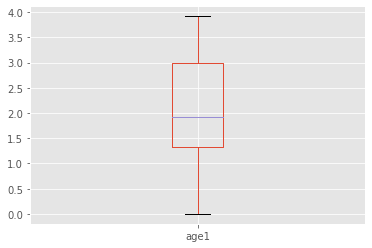

In [54]:
# Plotting age1 to see values
car['age1'].plot.box()

In [55]:
# Creating bins for age1
bins= [0,1,2,3,4]
car['age1_binned'] = pd.cut(car['age1'], bins)
car['age1_binned']

0        (3.0, 4.0]
1        (2.0, 3.0]
2        (3.0, 4.0]
3        (3.0, 4.0]
4        (3.0, 4.0]
            ...    
15914           NaN
15915    (0.0, 1.0]
15916    (0.0, 1.0]
15917    (0.0, 1.0]
15918    (0.0, 1.0]
Name: age1_binned, Length: 15919, dtype: category
Categories (4, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4]]

In [56]:
# Checking average km values in binned age and model group
car.groupby(['age1_binned','model1'])['km1'].mean().round()

age1_binned  model1  
(0, 1]       A1           2479.0
             A2              NaN
             A3           2432.0
             Astra        3000.0
             Clio         1006.0
             Corsa        1279.0
             Duster        101.0
             Espace       1795.0
             Insignia     3488.0
(1, 2]       A1          14292.0
             A2          26166.0
             A3          18698.0
             Astra       21607.0
             Clio        16275.0
             Corsa       17986.0
             Duster          NaN
             Espace      15237.0
             Insignia    22289.0
(2, 3]       A1          27734.0
             A2              NaN
             A3          44823.0
             Astra       51241.0
             Clio        38426.0
             Corsa       39819.0
             Duster          NaN
             Espace      43770.0
             Insignia    49908.0
(3, 4]       A1          54814.0
             A2              NaN
             A3      

In [57]:
# Checking median km values in binned age and model group
car.groupby(['age1_binned','model1'])['km1'].median().round()

age1_binned  model1  
(0, 1]       A1            512.0
             A2              NaN
             A3             44.0
             Astra         984.0
             Clio           10.0
             Corsa          10.0
             Duster        101.0
             Espace         15.0
             Insignia     1565.0
(1, 2]       A1          12819.0
             A2          26166.0
             A3          18112.0
             Astra       22000.0
             Clio        14280.0
             Corsa       17053.0
             Duster          NaN
             Espace      14856.0
             Insignia    23900.0
(2, 3]       A1          21500.0
             A2              NaN
             A3          37500.0
             Astra       45070.0
             Clio        33190.0
             Corsa       39700.0
             Duster          NaN
             Espace      44000.0
             Insignia    35000.0
(3, 4]       A1          52291.0
             A2              NaN
             A3      

In [59]:
# Filling missing values with average value of age1_binned and model group 
car['km2'] = car['km1'].fillna(car.groupby(['age1_binned','model1'])['km1'].apply(lambda x: x.fillna(round(x.median(), 0))))

In [60]:
print('Total Number of Missing Values for km1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['km1'].isnull().sum()), car['km2'].isnull().sum()))

Total Number of Missing Values for km1 Column
-------------------------------------------------------
Before: 1024 
After : 838



In [61]:
# Checking average Comfort_point1 values in model group
car.groupby(['Type1','model1','Fuel1'])['km1'].median().round().head(30)

Type1           model1    Fuel1   
Demonstration   A1        Diesel      12870.0
                          Gasoline     3500.0
                A3        Diesel      16500.0
                          Gasoline     5000.0
                Astra     Diesel       4100.0
                          Gasoline     2499.0
                Clio      Diesel         15.0
                          Gasoline      750.0
                Corsa     Gasoline      150.0
                Espace    Diesel       4490.0
                          Gasoline     4899.0
                Insignia  Diesel       3810.0
                          Gasoline     3500.0
Employee's car  A1        Diesel      19090.0
                          Gasoline     6320.0
                A2        Diesel      26166.0
                A3        Diesel      20000.0
                          Gasoline     5800.0
                Astra     Diesel      28529.0
                          Gasoline    22771.0
                Clio      Diesel      28500.0

In [62]:
# Filling resting 838 missing values with average value of Type1, model1 and Fuel1  group 
car['km2'] = car['km2'].fillna(car.groupby(['Type1','model1','Fuel1'])['km2'].apply(lambda x: x.fillna(x.median())))

In [63]:
print('Total Number of Missing Values for km1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['km1'].isnull().sum()), car['km2'].isnull().sum()))

Total Number of Missing Values for km1 Column
-------------------------------------------------------
Before: 1024 
After : 18



In [64]:
# Filling resting 19 missing values with average value of Type1, Fuel1 group 
car['km2'] = car['km2'].fillna(car.groupby(['Type1','Fuel1'])['km2'].apply(lambda x: x.fillna(x.median())))

In [65]:
print('Total Number of Missing Values for km1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['km1'].isnull().sum()), car['km2'].isnull().sum()))

Total Number of Missing Values for km1 Column
-------------------------------------------------------
Before: 1024 
After : 0



In [66]:
# Filling resting 1 missing values with average value of model group 
car['km2'] = car['km2'].fillna(car.groupby(['model1'])['km2'].apply(lambda x: x.fillna(x.median())))

In [67]:
print('Total Number of Missing Values for km1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['km1'].isnull().sum()), car['km2'].isnull().sum()))

Total Number of Missing Values for km1 Column
-------------------------------------------------------
Before: 1024 
After : 0



## Entertainment_point1

In [68]:
# Checking average Entertainment_point1 values in model group
car.groupby('model1')['Entertainment_point1'].mean().round(0)

model1
A1          5.0
A2          7.0
A3          5.0
Astra       5.0
Clio        4.0
Corsa       5.0
Duster      4.0
Espace      5.0
Insignia    5.0
Name: Entertainment_point1, dtype: float64

In [70]:
# Filling missing values with average value of model group 
car['Entertainment_point2'] = car['Entertainment_point1'].fillna(car.groupby('model1')['Entertainment_point1'].apply(lambda x: x.fillna(round(x.mean(), 0))))

In [71]:
print('Total Number of Missing Values for Entertainment_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Entertainment_point1'].isnull().sum()), car['Entertainment_point2'].isnull().sum()))

Total Number of Missing Values for Entertainment_point1 Column
-------------------------------------------------------
Before: 1374 
After : 0



## age1

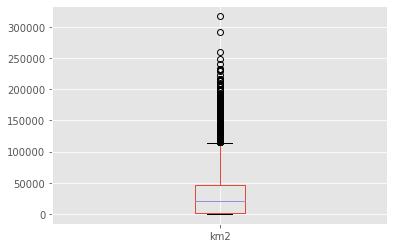

In [72]:
# Checking km values
car['km2'].plot.box()

In [73]:
car['age2']=car['age1'].fillna(car.groupby('Type1')['age1'].transform('mean'))

In [74]:
print('Total Number of Missing Values for Entertainment_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['age1'].isnull().sum()), car['age2'].isnull().sum()))

Total Number of Missing Values for Entertainment_point1 Column
-------------------------------------------------------
Before: 1597 
After : 0



*km2 has so many outliers, so using median will be better to fill age missing values*

In [75]:
car['km2'].min()

0.0

In [76]:
car['km2'].max()

317000.0

In [77]:
car.groupby(['Type1','km2'])['age1'].mean().round(2)

Type1          km2     
Demonstration  3.0         0.75
               4.0         0.58
               5.0         0.63
               6.0         0.67
               7.0         0.83
                           ... 
Used           240000.0    2.83
               248000.0    3.92
               260000.0    3.59
               291800.0    3.92
               317000.0    2.08
Name: age1, Length: 7181, dtype: float64

## Consump_country1

In [78]:
# Filling missing values with average value of model group 
car['Consump_country2'] = car['Consump_country1'].fillna(((car['Consump_comb1'] *2) - car['Consump_city1'] ).round(1))

In [79]:
print('Total Number of Missing Values for Entertainment_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Consump_country1'].isnull().sum()), car['Consump_country2'].isnull().sum()))

Total Number of Missing Values for Entertainment_point1 Column
-------------------------------------------------------
Before: 2376 
After : 2365



In [80]:
car['Consump_country2']=car['Consump_country2'].fillna(car.groupby('model1')['Consump_country2'].transform('mean').round(1))

In [81]:
print('Total Number of Missing Values for Entertainment_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Consump_country1'].isnull().sum()), car['Consump_country2'].isnull().sum()))

Total Number of Missing Values for Entertainment_point1 Column
-------------------------------------------------------
Before: 2376 
After : 0



## Consump_city1

In [82]:
# Filling missing values with average value of model group 
car['Consump_city2'] = car['Consump_city1'].fillna(((car['Consump_comb1'] *2) - car['Consump_country2']).round(1))

In [83]:
print('Total Number of Missing Values for Entertainment_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Consump_country1'].isnull().sum()), car['Consump_country2'].isnull().sum()))

Total Number of Missing Values for Entertainment_point1 Column
-------------------------------------------------------
Before: 2376 
After : 0



In [84]:
car['Consump_city2']=car['Consump_city2'].fillna(car.groupby('model1')['Consump_city2'].transform('mean').round(1))

In [85]:
print('Total Number of Missing Values for Entertainment_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Consump_country1'].isnull().sum()), car['Consump_country2'].isnull().sum()))

Total Number of Missing Values for Entertainment_point1 Column
-------------------------------------------------------
Before: 2376 
After : 0



## Consump_comb1

In [86]:
# Filling missing values with average value of model group 
car['Consump_comb2'] = car['Consump_comb1'].fillna(((car['Consump_city2'] + car['Consump_country2'])/2).round(1))

In [87]:
print('Total Number of Missing Values for Entertainment_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Consump_comb1'].isnull().sum()), car['Consump_comb2'].isnull().sum()))

Total Number of Missing Values for Entertainment_point1 Column
-------------------------------------------------------
Before: 2033 
After : 0



## CO2_Emission1

In [88]:
car['CO2_Emission2'] =car['CO2_Emission1'].fillna(car.groupby('Cylinders1')['CO2_Emission1'].transform('mean').round())

In [89]:
print('Total Number of Missing Values for Entertainment_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['CO2_Emission1'].isnull().sum()), car['CO2_Emission2'].isnull().sum()))

Total Number of Missing Values for Entertainment_point1 Column
-------------------------------------------------------
Before: 2436 
After : 1498



In [90]:
car['CO2_Emission2'] =car['CO2_Emission2'].fillna(car.groupby('model1')['CO2_Emission2'].transform('mean').round())

In [91]:
print('Total Number of Missing Values for Entertainment_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['CO2_Emission1'].isnull().sum()), car['CO2_Emission2'].isnull().sum()))

Total Number of Missing Values for Entertainment_point1 Column
-------------------------------------------------------
Before: 2436 
After : 1



In [92]:
car['CO2_Emission2'] = car['CO2_Emission2'].fillna(car.groupby('make1')['CO2_Emission2'].transform('mean').round())

In [93]:
print('Total Number of Missing Values for Entertainment_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['CO2_Emission1'].isnull().sum()), car['CO2_Emission2'].isnull().sum()))

Total Number of Missing Values for Entertainment_point1 Column
-------------------------------------------------------
Before: 2436 
After : 0



## Extras_point1

In [94]:
# Checking average Extras_point1 values in model group
car.groupby('model1')['Extras_point1'].mean().round(0)

model1
A1          3.0
A2          1.0
A3          2.0
Astra       3.0
Clio        2.0
Corsa       2.0
Duster      1.0
Espace      2.0
Insignia    3.0
Name: Extras_point1, dtype: float64

In [97]:
# Filling missing values with average value of model group 
car['Extras_point2'] = car['Extras_point1'].fillna(car.groupby('model1')['Extras_point1'].apply(lambda x: x.fillna(round(x.mean(), 0))))

In [98]:
print('Total Number of Missing Values for Extras_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Extras_point1'].isnull().sum()), car['Extras_point2'].isnull().sum()))

Total Number of Missing Values for Extras_point1 Column
-------------------------------------------------------
Before: 2962 
After : 0



## Upholstery1

In [99]:
car['Upholstery2'] = car['Upholstery1'].fillna(car.groupby('model1')['Upholstery1'].apply(lambda x: x.fillna(x.mode().iloc[0])))

In [100]:
print('Total Number of Missing Values for Extras_point1 Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Upholstery1'].isnull().sum()), car['Upholstery2'].isnull().sum()))

Total Number of Missing Values for Extras_point1 Column
-------------------------------------------------------
Before: 3722 
After : 0



## vat

In [101]:
# Checking most frequent values in Type1 group
car.groupby('Type1')['vat'].value_counts()

Type1           vat             
Demonstration   VAT deductible       692
Employee's car  VAT deductible       899
                Price negotiable       2
New             VAT deductible      1395
Pre-registered  VAT deductible      1207
                Price negotiable       3
Used            VAT deductible      6787
                Price negotiable     421
Name: vat, dtype: int64

In [102]:
# Filling missing values with most frequent value of Type1 group 
car['vat2'] = car['vat'].fillna(car.groupby('Type1')['vat'].apply(lambda x: x.fillna(x.mode().iloc[0])))

In [103]:
# Filling last 2 missing values with most frequent value
car['vat2'].fillna('VAT deductible', inplace=True)

In [104]:
print('Total Number of Missing Values for vat Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['vat'].isnull().sum()), car['vat2'].isnull().sum()))

Total Number of Missing Values for vat Column
-------------------------------------------------------
Before: 4513 
After : 0



## Gears1

In [105]:
car['Gears2']=car['Gears1'].fillna(car.groupby('model1')['Gears1'].transform('mean').round())
car['Gears2'][2614]=6.0  #set 6 for A2


In [106]:
print('Total Number of Missing Values for vat Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Gears1'].isnull().sum()), car['Gears2'].isnull().sum()))

Total Number of Missing Values for vat Column
-------------------------------------------------------
Before: 4712 
After : 0



## Cylinders

In [107]:
car.groupby('model1')['Cylinders1'].value_counts()

model1    Cylinders1
A1        3.0           1358
          4.0            396
          8.0              1
A3        4.0           1900
          3.0            373
          5.0             21
Astra     4.0           1244
          3.0            176
Clio      4.0            872
          3.0            188
          5.0              1
Corsa     4.0           1391
          3.0              9
          1.0              1
Duster    4.0             33
Espace    4.0            640
          2.0              1
          8.0              1
Insignia  4.0           1629
          6.0              3
          2.0              1
Name: Cylinders1, dtype: int64

In [108]:
car['Cylinders2'] = car['Cylinders1'].fillna(car.groupby('model1')['Cylinders1'].apply(lambda x: x.fillna(x.median())))
car['Cylinders2'][2614]=4.0         #For A2

In [109]:
print('Total Number of Missing Values for vat Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Gears1'].isnull().sum()), car['Gears2'].isnull().sum()))

Total Number of Missing Values for vat Column
-------------------------------------------------------
Before: 4712 
After : 0



## Drive_chain1

In [110]:
car['Drive_chain2'] = car['Drive_chain1'].fillna(car.groupby('model1')['Drive_chain1'].apply(lambda x: x.fillna(x.mode().iloc[0])))

In [111]:
print('Total Number of Missing Values for vat Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Drive_chain1'].isnull().sum()), car['Drive_chain2'].isnull().sum()))

Total Number of Missing Values for vat Column
-------------------------------------------------------
Before: 6858 
After : 0



## Weight1

In [112]:
car['Weight2']=car['Weight1'].fillna(car.groupby('model1')['Weight1'].transform('mean').round())
# Average weight of Duster is 1373 kg. Set the weight of Dusters [14894:14928] to 1373
car['Weight2'][14894:14928]=1373
# Average weight of A2 is 963 kg. Set the weight of A2 [2614:2615] to 963
car['Weight2'][2614:2615]=963


In [113]:
print('Total Number of Missing Values for vat Column')
print('-------------------------------------------------------')
print('Before: {} \nAfter : {}\n'.format((car['Weight1'].isnull().sum()), car['Weight2'].isnull().sum()))

Total Number of Missing Values for vat Column
-------------------------------------------------------
Before: 6974 
After : 0



## Dropping Columns After Filling Missing Values

In [114]:
drop_after_misfill=['body_type', 'vat',
       'short_description1_displ', 'km1', 'age1', 'hp1', 'Type1',
       'Body_Color1', 'Upholstery1', 'Nr_of_Doors1', 'Nr_of_Seats1',
       'Displacement1', 'Cylinders1', 'Weight1',
       'Drive_chain1', 'Consump_comb1', 'Consump_city1',
       'Consump_country1', 'CO2_Emission1', 'Comfort_point1',
       'Entertainment_point1', 'Extras_point1', 'Safety_point1', 'Gears1']

In [115]:
# Dropping columns after filling operations
print('Shape of car DataFrame BEFORE filling operations:', car.shape)
car.drop(drop_after_misfill, axis=1, inplace=True)
print('Shape of car DataFrame AFTER filling operations :', car.shape)

Shape of car DataFrame BEFORE filling operations: (15919, 53)
Shape of car DataFrame AFTER filling operations : (15919, 29)


In [116]:
car.columns

Index(['price', 'make1', 'model1', 'Gearing_Type1', 'Fuel1', 'Type2', 'body_type2', 'hp2', 'Nr_of_Doors2', 'Displacement2', 'Body_Color2', 'Comfort_point2', 'Nr_of_Seats2', 'Safety_point2', 'age1_binned', 'km2', 'Entertainment_point2', 'age2', 'Consump_country2', 'Consump_city2', 'Consump_comb2', 'CO2_Emission2', 'Extras_point2', 'Upholstery2', 'vat2', 'Gears2', 'Cylinders2', 'Drive_chain2', 'Weight2'], dtype='object')

In [117]:
# Checking data frame
car.head()

,price,make1,model1,Gearing_Type1,Fuel1,Type2,body_type2,hp2,Nr_of_Doors2,Displacement2,Body_Color2,Comfort_point2,Nr_of_Seats2,Safety_point2,age1_binned,km2,Entertainment_point2,age2,Consump_country2,Consump_city2,Consump_comb2,CO2_Emission2,Extras_point2,Upholstery2,vat2,Gears2,Cylinders2,Drive_chain2,Weight2
0,15770,Audi,A1,Automatic,Diesel,Used,Sedans,66.0,5.0,1.4,Black,16.0,5.0,14.0,"(3, 4]",56013.0,4.0,3.917808,3.8,3.8,3.8,99.0,3.0,Cloth,VAT deductible,6.0,3.0,front,1220.0
1,14500,Audi,A1,Automatic,Gasoline,Used,Sedans,141.0,3.0,1.8,Red,9.0,4.0,15.0,"(2, 3]",80000.0,5.0,2.753425,5.6,5.6,5.6,129.0,4.0,Cloth,Price negotiable,7.0,4.0,front,1255.0
2,14640,Audi,A1,Automatic,Diesel,Used,Sedans,85.0,4.0,1.6,Black,13.0,4.0,12.0,"(3, 4]",83450.0,2.0,3.832877,3.8,3.8,3.8,99.0,2.0,Cloth,VAT deductible,6.0,3.0,front,1229.0
3,14500,Audi,A1,Automatic,Diesel,Used,Sedans,66.0,3.0,1.4,Brown,16.0,4.0,14.0,"(3, 4]",73000.0,8.0,3.334247,3.8,3.8,3.8,99.0,3.0,Cloth,VAT deductible,6.0,3.0,front,1195.0
4,16790,Audi,A1,Automatic,Diesel,Used,Sedans,66.0,5.0,1.4,Black,13.0,5.0,13.0,"(3, 4]",16200.0,7.0,3.586301,4.1,4.1,4.1,109.0,4.0,Cloth,VAT deductible,6.0,3.0,front,1229.0


# Handling with Outliers

In [118]:
# Checking numeric column statistical values
car.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
price,15919.0,18019.896727,7386.169409,13.0,12850.000000,16900.000000,21900.000000,74600.000000
hp2,15919.0,88.389660,26.849550,1.0,66.000000,85.000000,101.000000,294.000000
Nr_of_Doors2,15919.0,4.660657,0.642198,1.0,4.000000,5.000000,5.000000,7.000000
Displacement2,15919.0,1.428978,0.343418,0.0,1.200000,1.500000,1.600000,16.000000
Comfort_point2,15919.0,12.300521,5.835628,1.0,8.000000,13.000000,16.000000,33.000000
Nr_of_Seats2,15919.0,4.952949,0.474753,2.0,5.000000,5.000000,5.000000,7.000000
Safety_point2,15919.0,12.804448,3.957624,1.0,11.000000,13.000000,15.000000,29.000000
km2,15919.0,31976.275363,37063.400396,0.0,1900.000000,20446.000000,46900.000000,317000.000000
Entertainment_point2,15919.0,4.700484,1.919669,1.0,3.000000,5.000000,6.000000,10.000000
age2,15919.0,2.023014,1.085187,0.0,0.915068,1.830137,2.872603,3.917808


In [119]:
car.select_dtypes(include='number').columns

Index(['price', 'hp2', 'Nr_of_Doors2', 'Displacement2', 'Comfort_point2', 'Nr_of_Seats2', 'Safety_point2', 'km2', 'Entertainment_point2', 'age2', 'Consump_country2', 'Consump_city2', 'Consump_comb2', 'CO2_Emission2', 'Extras_point2', 'Gears2', 'Cylinders2', 'Weight2'], dtype='object')

In [120]:
# Importing winsorize from scipy
from scipy.stats.mstats import winsorize

In [121]:
car['Gears2'].value_counts()

6.0    9362
5.0    4412
7.0    1908
8.0     224
9.0       6
4.0       2
3.0       2
1.0       2
2.0       1
Name: Gears2, dtype: int64

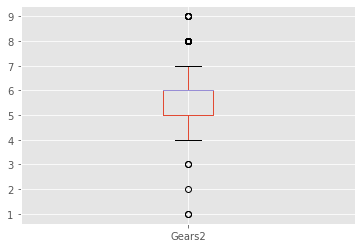

In [122]:
# Gears boxplot
car['Gears2'].plot.box()

In [123]:
# Number of Seats values by body type group
car.groupby('body_type2')['Nr_of_Seats2'].value_counts()

body_type2     Nr_of_Seats2
Compact        5.0             2707
               4.0              436
               2.0                8
               7.0                2
               3.0                1
               6.0                1
Convertible    4.0                5
               5.0                3
Coupe          5.0               22
               4.0                2
               2.0                1
Off-Road       5.0               53
               7.0                3
Other          5.0              281
               2.0                4
               7.0                3
               4.0                2
Sedans         5.0             7186
               4.0              664
               2.0               71
               7.0                4
Station wagon  5.0             3528
               7.0               19
               4.0               14
               2.0                1
               6.0                1
Transporter    5.0               41


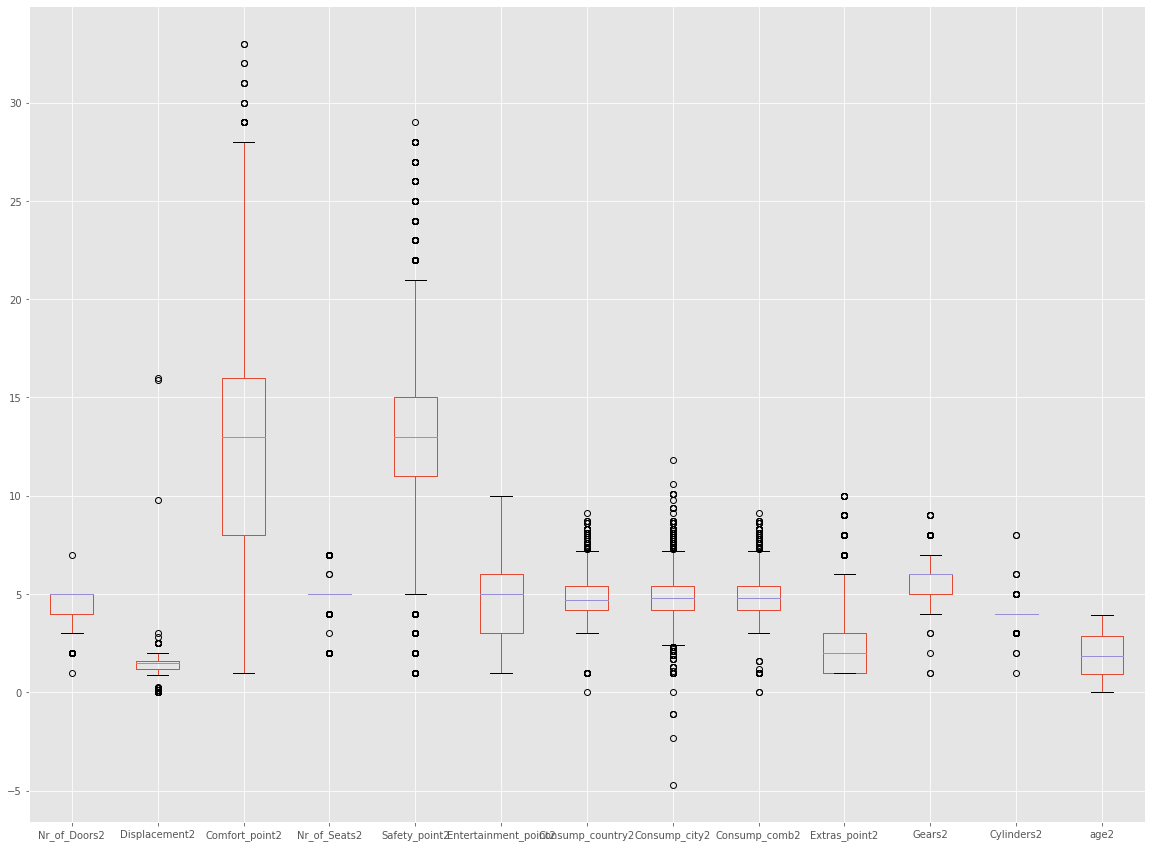

In [124]:
# Box plots of some columns
car[['Nr_of_Doors2', 'Displacement2', 'Comfort_point2',
       'Nr_of_Seats2', 'Safety_point2', 'Entertainment_point2',
       'Consump_country2', 'Consump_city2', 'Consump_comb2',
       'Extras_point2', 'Gears2', 'Cylinders2', 'age2']].plot.box(figsize=(20,15))

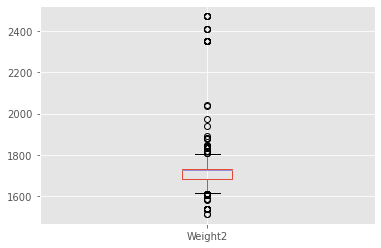

In [125]:
# Espace model weight box plot
car[car['model1']=='Espace']['Weight2'].plot.box()

In [126]:
# Displacement value counts
car['Displacement2'].value_counts()

1.6     5347
1.4     3122
1.0     2582
1.5     1500
2.0     1187
1.2     1183
0.9      377
1.1      289
1.8      211
1.3       39
0.0       38
2.5       20
0.1        7
0.2        6
1.7        3
1.9        2
9.8        1
0.3        1
16.0       1
3.0        1
2.8        1
15.9       1
Name: Displacement2, dtype: int64

In [127]:
# Model value counts
car['model1'].value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model1, dtype: int64

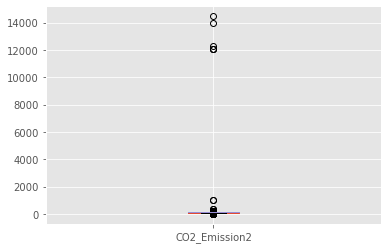

In [128]:
# CO2_Emission2 box plot
car['CO2_Emission2'].plot.box()

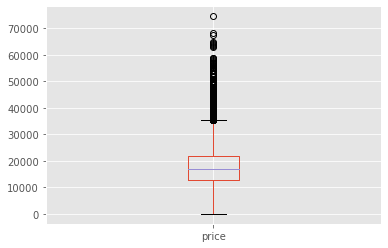

In [129]:
# price box plot
car['price'].plot.box()

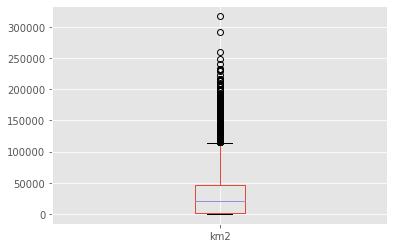

In [130]:
# km box plot
car['km2'].plot.box()

In [131]:
# hp value counts
car['hp2'].value_counts()

85.0     2546
66.0     2125
81.0     1403
100.0    1317
110.0    1112
         ... 
132.0       1
44.0        1
9.0         1
84.0        1
163.0       1
Name: hp2, Length: 80, dtype: int64

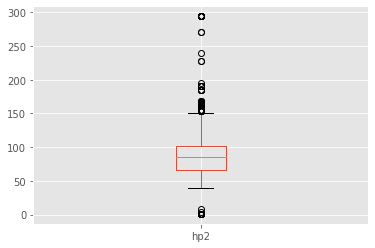

In [132]:
# hp box plot
car['hp2'].plot.box()

In [133]:
# hp stats values
car['hp2'].describe()

count    15919.00000
mean        88.38966
std         26.84955
min          1.00000
25%         66.00000
50%         85.00000
75%        101.00000
max        294.00000
Name: hp2, dtype: float64

In [134]:
# Consump_country2 values equal or below zero
car[car['Consump_country2'] <= 0]

,price,make1,model1,Gearing_Type1,Fuel1,Type2,body_type2,hp2,Nr_of_Doors2,Displacement2,Body_Color2,Comfort_point2,Nr_of_Seats2,Safety_point2,age1_binned,km2,Entertainment_point2,age2,Consump_country2,Consump_city2,Consump_comb2,CO2_Emission2,Extras_point2,Upholstery2,vat2,Gears2,Cylinders2,Drive_chain2,Weight2
10566,16900,Opel,Insignia,Automatic,Diesel,Used,Station wagon,125.0,5.0,2.0,Black,14.0,5.0,15.0,"(2, 3]",59800.0,2.0,2.668493,0.0,0.0,0.0,0.0,2.0,Part leather,VAT deductible,6.0,4.0,front,1589.0


In [135]:
# Filling missing values with median if values are equal or below zero
car['Consump_country2'] =  car['Consump_country2'].apply(lambda x: car['Consump_country2'].median() if x<=0 else x)

In [138]:
# Filling missing values with median if values are equal or below zero
car['Consump_city2'] =  car['Consump_city2'].apply(lambda x: car['Consump_city2'].median() if x<=0 else x)

In [139]:
# Filling missing values with median if values are equal or below zero
car['Consump_comb2'] =  car['Consump_comb2'].apply(lambda x: car['Consump_comb2'].median() if x<=0 else x)

In [140]:
# Filling missing values with median if values are out of possible range
car['Displacement2'] = car['Displacement2'].apply(lambda x: car['Displacement2'].median() if (x<=0.5 or x>= 3.5) else x)

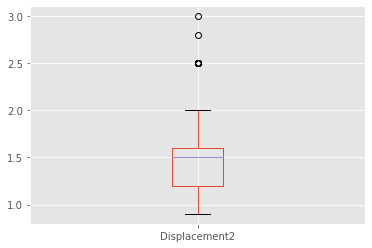

In [141]:
# Displacement2 box plot
car['Displacement2'].plot.box()

In [142]:
# Filling missing values with median if values are below 30
car['hp2'] = car['hp2'].apply(lambda x: car['hp2'].median() if x<=30 else x)

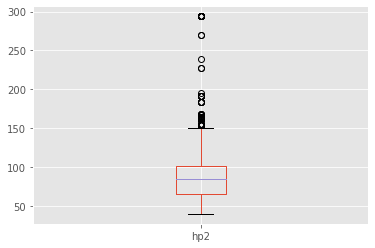

In [143]:
# hp2 box plot
car['hp2'].plot.box()

In [144]:
# Weight2 stats values
car['Weight2'].describe()

count    15919.000000
mean      1355.532006
std        200.377020
min          1.000000
25%       1180.000000
50%       1345.000000
75%       1472.000000
max       2471.000000
Name: Weight2, dtype: float64

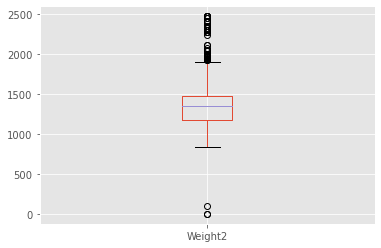

In [145]:
# Weight2 box plot
car['Weight2'].plot.box()

In [146]:
# Filling missing values with median if values are below 500
car['Weight2'] = car['Weight2'].apply(lambda x: car['Weight2'].median() if x<=500 else x)

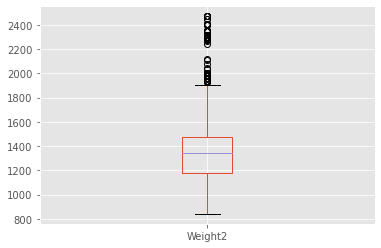

In [147]:
# Weight2 box plot
car['Weight2'].plot.box()

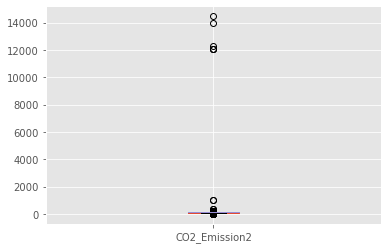

In [148]:
# CO2_Emission2 box plot
car['CO2_Emission2'].plot.box()

In [149]:
# Filling missing values with median if values are out of accepted range
car['CO2_Emission2'] = car['CO2_Emission2'].apply(lambda x: car['CO2_Emission2'].median() if (x<=20 or x>=400) else x)

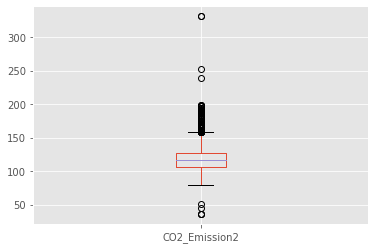

In [150]:
# CO2_Emission2 box plot
car['CO2_Emission2'].plot.box()

In [151]:
car['Gears2'].value_counts()

6.0    9362
5.0    4412
7.0    1908
8.0     224
9.0       6
4.0       2
3.0       2
1.0       2
2.0       1
Name: Gears2, dtype: int64

In [152]:
# Filling missing values with median if values are out of accepted range
car['Gears2'] = car['Gears2'].apply(lambda x: car['Gears2'].median() if (x<=4 or x>=9) else x)

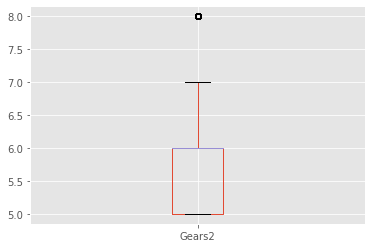

In [153]:
# Gears2 box plot
car['Gears2'].plot.box()

In [154]:
# Checking columns
car.columns

Index(['price', 'make1', 'model1', 'Gearing_Type1', 'Fuel1', 'Type2', 'body_type2', 'hp2', 'Nr_of_Doors2', 'Displacement2', 'Body_Color2', 'Comfort_point2', 'Nr_of_Seats2', 'Safety_point2', 'age1_binned', 'km2', 'Entertainment_point2', 'age2', 'Consump_country2', 'Consump_city2', 'Consump_comb2', 'CO2_Emission2', 'Extras_point2', 'Upholstery2', 'vat2', 'Gears2', 'Cylinders2', 'Drive_chain2', 'Weight2'], dtype='object')

In [156]:
# Selecting only numerical columns
car.select_dtypes(include='number').columns

Index(['price', 'hp2', 'Nr_of_Doors2', 'Displacement2', 'Comfort_point2', 'Nr_of_Seats2', 'Safety_point2', 'km2', 'Entertainment_point2', 'age2', 'Consump_country2', 'Consump_city2', 'Consump_comb2', 'CO2_Emission2', 'Extras_point2', 'Gears2', 'Cylinders2', 'Weight2'], dtype='object')

In [158]:
# Applying winsorize
car['Consump_country3'] = winsorize(car['Consump_country2'], limits=[0.01, 0.01])

In [159]:
# Applying winsorize
car['Consump_city3'] = winsorize(car['Consump_city2'], limits=[0.01, 0.01])

In [160]:
# Applying winsorize
car['Consump_comb3'] = winsorize(car['Consump_comb2'], limits=[0.01, 0.01])

In [161]:
# Applying winsorize
car['CO2_Emission3'] = winsorize(car['CO2_Emission2'], limits=[0.01, 0.01])

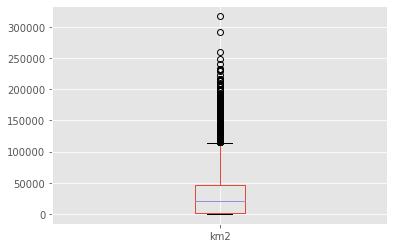

In [164]:
# km box plot
car['km2'].plot.box()

In [165]:
# Applying winsorize
car['Weight3'] = winsorize(car['Weight2'], limits=[0, 0.02])

In [166]:
# Applying winsorize
car['hp3'] = winsorize(car['hp2'], limits=[0, 0.02])

In [167]:
# Applying winsorize
car['km3'] = winsorize(car['km2'], limits=[0, 0.03])

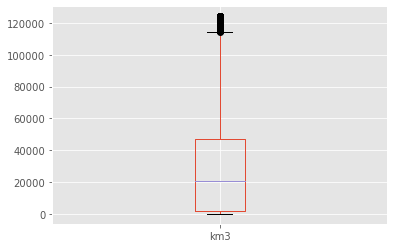

In [168]:
# km box plot
car['km3'].plot.box()

In [170]:
# Creating a list of column names, adding "3" prefix to make it clear
column_name={'make1':'make3', 'model1':'model3', 'Gearing_Type1':'Gearing_Type3', 'Fuel1':'Fuel3', 'Type2':'Type3', 'body_type2':'body_type3',\
'Nr_of_Doors2':'Nr_of_Doors3','Body_Color2':'Body_Color3','Comfort_point2':'Comfort_point3','Nr_of_Seats2':'Nr_of_Seats3','Safety_point2':'Safety_point3',\
'Entertainment_point2':'Entertainment_point3','age2':'age3','Extras_point2':'Extras_point3','Upholstery2':'Upholstery3','vat2':'vat3',\
'Gears2':'Gears3','Cylinders2':'Cylinders3','Drive_chain2':'Drive_chain3'}

In [171]:
# Renaming column names
car = car.rename(columns=column_name)

In [172]:
# Columns after rename
car.columns

Index(['price', 'make3', 'model3', 'Gearing_Type3', 'Fuel3', 'Type3', 'body_type3', 'hp2', 'Nr_of_Doors3', 'Displacement2', 'Body_Color3', 'Comfort_point3', 'Nr_of_Seats3', 'Safety_point3', 'age1_binned', 'km2', 'Entertainment_point3', 'age3', 'Consump_country2', 'Consump_city2', 'Consump_comb2', 'CO2_Emission2', 'Extras_point3', 'Upholstery3', 'vat3', 'Gears3', 'Cylinders3', 'Drive_chain3', 'Weight2', 'Consump_country3', 'Consump_city3', 'Consump_comb3', 'CO2_Emission3', 'Weight3', 'hp3', 'km3'], dtype='object')

In [173]:
# Creating a list of columns to drop
drop_after_outliers = ['hp2', 'Displacement2','age1_binned', 'km2',\
                       'Consump_country2', 'Consump_city2', 'Consump_comb2', 'CO2_Emission2',\
                       'Weight2']

In [174]:
# Dropping columns after filling operations
print('Shape of car DataFrame BEFORE handling with outliers:', car.shape)
car.drop(drop_after_outliers, axis=1, inplace=True)
print('Shape of car DataFrame AFTER handling with outliers:', car.shape)

Shape of car DataFrame BEFORE handling with outliers: (15919, 36)
Shape of car DataFrame AFTER handling with outliers: (15919, 27)


In [175]:
# Columns after drop
car.columns

Index(['price', 'make3', 'model3', 'Gearing_Type3', 'Fuel3', 'Type3', 'body_type3', 'Nr_of_Doors3', 'Body_Color3', 'Comfort_point3', 'Nr_of_Seats3', 'Safety_point3', 'Entertainment_point3', 'age3', 'Extras_point3', 'Upholstery3', 'vat3', 'Gears3', 'Cylinders3', 'Drive_chain3', 'Consump_country3', 'Consump_city3', 'Consump_comb3', 'CO2_Emission3', 'Weight3', 'hp3', 'km3'], dtype='object')

In [176]:
# Dataframe
car.head()

,price,make3,model3,Gearing_Type3,Fuel3,Type3,body_type3,Nr_of_Doors3,Body_Color3,Comfort_point3,Nr_of_Seats3,Safety_point3,Entertainment_point3,age3,Extras_point3,Upholstery3,vat3,Gears3,Cylinders3,Drive_chain3,Consump_country3,Consump_city3,Consump_comb3,CO2_Emission3,Weight3,hp3,km3
0,15770,Audi,A1,Automatic,Diesel,Used,Sedans,5.0,Black,16.0,5.0,14.0,4.0,3.917808,3.0,Cloth,VAT deductible,6.0,3.0,front,3.8,3.8,3.8,99.0,1220.0,66.0,56013.0
1,14500,Audi,A1,Automatic,Gasoline,Used,Sedans,3.0,Red,9.0,4.0,15.0,5.0,2.753425,4.0,Cloth,Price negotiable,7.0,4.0,front,5.6,5.6,5.6,129.0,1255.0,141.0,80000.0
2,14640,Audi,A1,Automatic,Diesel,Used,Sedans,4.0,Black,13.0,4.0,12.0,2.0,3.832877,2.0,Cloth,VAT deductible,6.0,3.0,front,3.8,3.8,3.8,99.0,1229.0,85.0,83450.0
3,14500,Audi,A1,Automatic,Diesel,Used,Sedans,3.0,Brown,16.0,4.0,14.0,8.0,3.334247,3.0,Cloth,VAT deductible,6.0,3.0,front,3.8,3.8,3.8,99.0,1195.0,66.0,73000.0
4,16790,Audi,A1,Automatic,Diesel,Used,Sedans,5.0,Black,13.0,5.0,13.0,7.0,3.586301,4.0,Cloth,VAT deductible,6.0,3.0,front,4.1,4.1,4.1,109.0,1229.0,66.0,16200.0


In [177]:
# Creating a list to apply get dummies
dummy_list = ['make3', 'model3', 'Gearing_Type3', 'Fuel3', 'Type3', 'body_type3', 'Body_Color3', 'Upholstery3', 'vat3', 'Drive_chain3']

In [178]:
# Applying get dummies
car = pd.get_dummies(car, columns=dummy_list)

In [179]:
# Shape of dataframe after get dummies
car.shape

(15919, 72)

In [180]:
# Checking dataframe
car.head()

,price,Nr_of_Doors3,Comfort_point3,Nr_of_Seats3,Safety_point3,Entertainment_point3,age3,Extras_point3,Gears3,Cylinders3,Consump_country3,Consump_city3,Consump_comb3,CO2_Emission3,Weight3,hp3,km3,make3_Audi,make3_Opel,make3_Renault,model3_A1,model3_A2,model3_A3,model3_Astra,model3_Clio,model3_Corsa,model3_Duster,model3_Espace,model3_Insignia,Gearing_Type3_Automatic,Gearing_Type3_Manual,Gearing_Type3_Semi-automatic,Fuel3_Diesel,Fuel3_Electric,Fuel3_Gasoline,Fuel3_LPG/CNG,Type3_Demonstration,Type3_Employee's car,Type3_New,Type3_Pre-registered,Type3_Used,body_type3_Compact,body_type3_Convertible,body_type3_Coupe,body_type3_Off-Road,body_type3_Other,body_type3_Sedans,body_type3_Station wagon,body_type3_Transporter,body_type3_Van,Body_Color3_Beige,Body_Color3_Black,Body_Color3_Blue,Body_Color3_Bronze,Body_Color3_Brown,Body_Color3_Gold,Body_Color3_Green,Body_Color3_Grey,Body_Color3_Orange,Body_Color3_Red,Body_Color3_Silver,Body_Color3_Violet,Body_Color3_White,Body_Color3_Yellow,Upholstery3_Cloth,Upholstery3_Full leather,Upholstery3_Part leather,vat3_Price negotiable,vat3_VAT deductible,Drive_chain3_4WD,Drive_chain3_front,Drive_chain3_rear
0,15770,5.0,16.0,5.0,14.0,4.0,3.917808,3.0,6.0,3.0,3.8,3.8,3.8,99.0,1220.0,66.0,56013.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,14500,3.0,9.0,4.0,15.0,5.0,2.753425,4.0,7.0,4.0,5.6,5.6,5.6,129.0,1255.0,141.0,80000.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,14640,4.0,13.0,4.0,12.0,2.0,3.832877,2.0,6.0,3.0,3.8,3.8,3.8,99.0,1229.0,85.0,83450.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,14500,3.0,16.0,4.0,14.0,8.0,3.334247,3.0,6.0,3.0,3.8,3.8,3.8,99.0,1195.0,66.0,73000.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,16790,5.0,13.0,5.0,13.0,7.0,3.586301,4.0,6.0,3.0,4.1,4.1,4.1,109.0,1229.0,66.0,16200.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [182]:
# Exporting data to csv file
car.to_csv (r'car_Part2_cleaned.csv', index = False, header=True)